In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/delivery_time.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
import matplotlib.pyplot as plt

In [7]:
data1 = data.rename({'Sorting Time': 'Sortingtime'}, axis=1)

In [8]:
data2 = data1.rename({'Delivery Time': 'Deliverytime'}, axis=1)

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Deliverytime  21 non-null     float64
 1   Sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
#tips = sns.load_dataset("tips")
#sns.kdeplot(data=tips, x="total_bill"

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Sortingtime', ylabel='Density'>

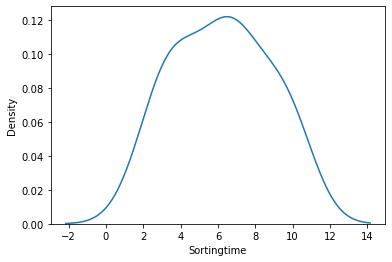

In [12]:
sns.kdeplot(data=data2, x="Sortingtime")

In [14]:
data.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [15]:
data.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

<AxesSubplot:xlabel='Deliverytime', ylabel='Density'>

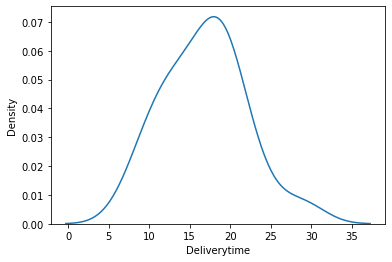

In [13]:
sns.kdeplot(data=data2, x="Deliverytime")

<AxesSubplot:>

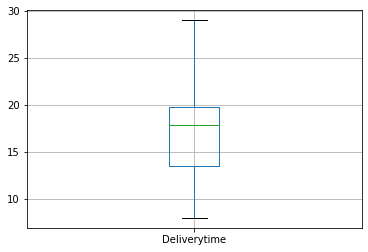

In [16]:
data2.boxplot(column=['Deliverytime'])

<AxesSubplot:>

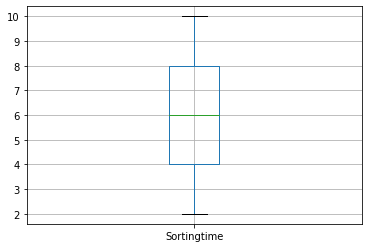

In [17]:
data2.boxplot(column=['Sortingtime'])

In [10]:
x = data2.Sortingtime
y = data2.Deliverytime

Text(0, 0.5, 'Deliverytime')

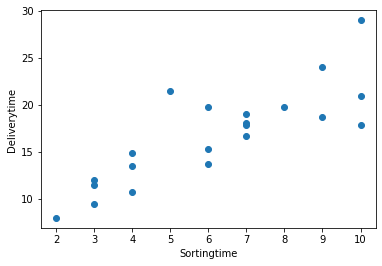

In [11]:
plt.scatter(x,y)
plt.xlabel("Sortingtime")
plt.ylabel("Deliverytime")

In [18]:
data2.head()

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [19]:
data2.corr()

,Deliverytime,Sortingtime
Deliverytime,1.000000,0.825997
Sortingtime,0.825997,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sortingtime', ylabel='Density'>

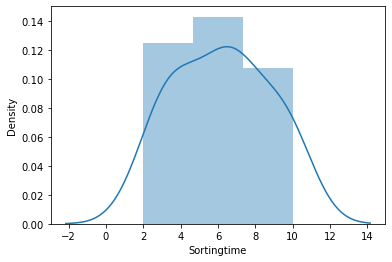

In [20]:
import seaborn as sns
sns.distplot(data2['Sortingtime'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deliverytime', ylabel='Density'>

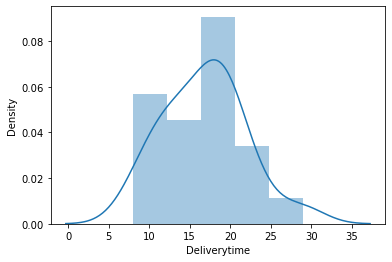

In [21]:
sns.distplot(data2['Deliverytime'])

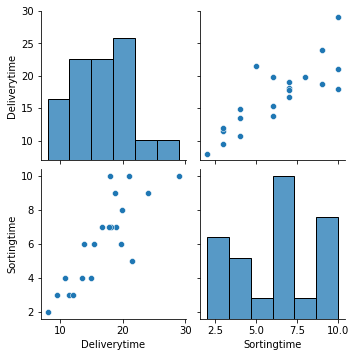

In [22]:
sns.pairplot(data2)

In [34]:
data2["logSortingtime"]=pd.Series(np.log(data2.Sortingtime))

In [70]:
data2["logDeliverytime"]=pd.Series(np.log(data2.Deliverytime))

In [71]:
import numpy as np

In [72]:
import statsmodels.formula.api as smf
model = smf.ols('logDeliverytime~logSortingtime', data = data2).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logDeliverytime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.60e-07
Time:                        22:13:01   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7420      0.133     13.086      0.000       1.463       2.021
logSortingtime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
pred  = model.predict(data2.logSortingtime)
pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [76]:
errors = data2.logDeliverytime-pred
errors.sum()

3.4638958368304884e-14

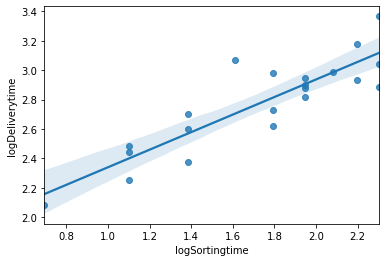

In [77]:
sns.regplot(x="logSortingtime" , y="logDeliverytime", data=data2);

In [78]:
model.params

Intercept         1.741987
logSortingtime    0.597522
dtype: float64

In [79]:
print(model.tvalues, '\n', model.pvalues)

Intercept         13.085552
logSortingtime     8.024484
dtype: float64 
 Intercept         5.921137e-11
logSortingtime    1.601539e-07
dtype: float64


In [80]:
newdata=pd.Series([15,20])

In [81]:
data_pred=pd.DataFrame(newdata,columns=['logSortingtime'])
model.predict(data_pred)

0    10.704822
1    13.692434
dtype: float64